In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
ds_train = pd.read_csv("train.csv")
ds_test = pd.read_csv("test.csv")

In [3]:
ds_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
ds_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
ds_train.describe()    # checking statistics of data like any outliers 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
ds_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
ds_train.info()  # checking null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Clearly Embarked, Age and Cabin has Missing Values in train data

In [8]:
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Clearly Age, Fare and Cabin has Missing Values in test data

#### Finding correlations between features, How they are related to each other


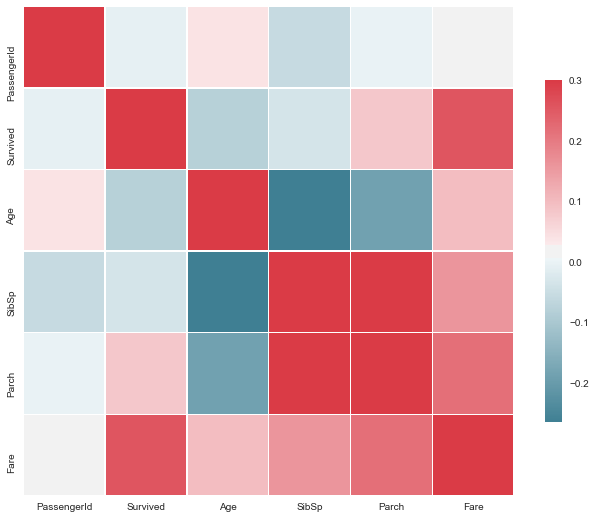

In [52]:
# Correlation matrix - linear relation among independent attributes and with the Target attribute

sns.set(style="white")

# Compute the correlation matrix
correln = ds_train.corr()

# Generate a mask for the upper triangle
#mask = np.zeros_like(correln, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correln,  cmap=cmap, vmax=.3, #mask=mask,
            linewidths=.5, cbar_kws={"shrink": .7})


Fare has highest positive correlation with Survived follwed by Parch and Pclass displayed by color Dark red, light red and light blue

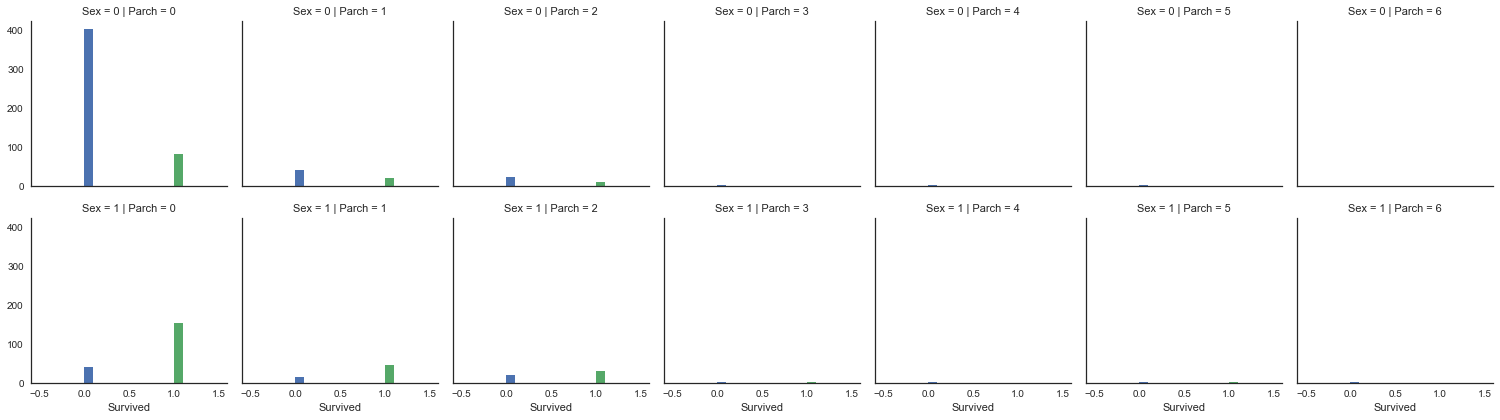

In [50]:
# Parch and Sex Vs Survived

g = sns.FacetGrid(ds_train, col="Parch",  row="Sex", hue = 'Survived')
g = g.map(plt.hist, "Survived")

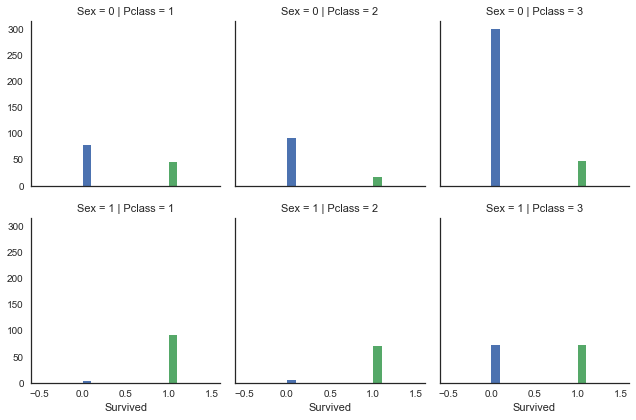

In [51]:
# Passenger class and Sex Vs Survived

g = sns.FacetGrid(ds_train, col="Pclass",  row="Sex", hue = 'Survived')
g = g.map(plt.hist, "Survived")

Observations:

1) Females had greater chance of survival

2) Pclass 1 and 2 had greater survival rates than class 3 across male and female categories

In [10]:
print(ds_train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [11]:
ds_train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
ds_train['Embarked']=ds_train['Embarked'].replace(np.nan,"S")
ds_test['Embarked']=ds_test['Embarked'].replace(np.nan,"S")

In [13]:
ds_test[ds_test['Fare'].isna()]['Pclass']

152    3
Name: Pclass, dtype: int64

In [14]:
ds_test['Fare'] = np.where(ds_test['Fare'].isna(), np.nanmedian(ds_test[ds_test['Pclass']==3]['Fare']), ds_test['Fare'])
# imputing fare with respect to pclass with a median value of Fare considering only Pclass of 3 as fare greatly changed with Pclass

In [15]:
ds_train["Sex"] = ds_train["Sex"].map({"male" : 0, "female" : 1}).astype("category")
ds_train['Pclass'] = ds_train['Pclass'].astype("category")
ds_train['Embarked'] = ds_train['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype("category")

ds_test['Sex'] = ds_test['Sex'].map({'male':0, 'female':1}).astype("category")  
ds_test['Pclass'] = ds_test['Pclass'].astype("category")
ds_test['Embarked'] = ds_test['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype("category")

In [16]:
# Imputing missing values in Cabin with "Unknown"

ds_train['Cabin']=ds_train['Cabin'].replace(np.nan,"Unknown").astype("category")
ds_test['Cabin']=ds_test['Cabin'].replace(np.nan,"Unknown").astype("category")

In [17]:
ds_train['title'] = ds_train['Name'].str.split(',').apply(lambda x: x[1])
ds_test['title'] = ds_test['Name'].str.split(',').apply(lambda x: x[1])

In [18]:
ds_train['title'] = ds_train['title'].str.split('.').apply(lambda x: x[0])
ds_test['title'] = ds_test['title'].str.split('.').apply(lambda x: x[0])

In [19]:
ds_train['title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Col               2
 Mlle              2
 Don               1
 Capt              1
 Sir               1
 Mme               1
 the Countess      1
 Lady              1
 Jonkheer          1
 Ms                1
Name: title, dtype: int64

In [20]:
ds_train['title'] = ds_train['title'].apply(lambda x: x.strip())
ds_test['title'] = ds_test['title'].apply(lambda x: x.strip())

In [21]:
# Refining Titles in train dataset

ds_train['title'] = np.where(((ds_train['title']== 'Rev') | (ds_train['title']== 'Col') |
                                (ds_train['title']== 'Major') | (ds_train['title']== 'Capt') |
                                (ds_train['title']== 'Don') | (ds_train['title']== 'Sir') |
                                (ds_train['title']== 'Jonkheer') | (ds_train['title']== 'Dr')), 'Mr', ds_train['title'])

ds_train['title'] = np.where(((ds_train['title']== 'Mlle') | (ds_train['title']== 'Lady') | 
                             (ds_train['title']== 'the Countess') | (ds_train['title']== 'Mme') |
                             (ds_train['title']== 'Dona')), 'Mrs', ds_train['title'])

ds_train['title'] = np.where(ds_train['title']=='Ms', 'Miss',ds_train['title'])

In [22]:
# Refining Titles in test dataset

ds_test['title'] = np.where(((ds_test['title']== 'Rev') | (ds_test['title']== 'Col') |
                                (ds_test['title']== 'Major') | (ds_test['title']== 'Capt') |
                                (ds_test['title']== 'Don') | (ds_test['title']== 'Sir') |
                                (ds_test['title']== 'Jonkheer') | (ds_test['title']== 'Dr')), 'Mr', ds_test['title'])

ds_test['title'] = np.where(((ds_test['title']== 'Mlle') | (ds_test['title']== 'Lady') | 
                             (ds_test['title']== 'the Countess') | (ds_test['title']== 'Mme') |
                             (ds_test['title']== 'Dona')), 'Mrs', ds_test['title'])

ds_test['title'] = np.where(ds_test['title']=='Ms', 'Miss',ds_test['title'])

In [23]:
ds_train['title'].value_counts()

Mr        538
Miss      183
Mrs       130
Master     40
Name: title, dtype: int64

In [24]:
# Title encoding

ds_train['title_enc'] = ds_train['title'].map({'Mr':0, 'Miss':1,'Mrs':2,'Master':3}).astype('category')
ds_test['title_enc'] = ds_test['title'].map({'Mr':0, 'Miss':1,'Mrs':2,'Master':3}).astype('category')

In [25]:
# Imputing with median of the respective group - Train dataset

ds_train['Age'] = np.where(((ds_train['title']=='Mrs') & (ds_train['Age'].isna())), np.nanmedian(ds_train[ds_train['title']=='Mrs']['Age']), ds_train['Age'])
ds_train['Age'] = np.where(((ds_train['title']=='Miss') & (ds_train['Age'].isna())), np.nanmedian(ds_train[ds_train['title']=='Miss']['Age']), ds_train['Age'])
ds_train['Age'] = np.where(((ds_train['title']=='Mr') & (ds_train['Age'].isna())), np.nanmedian(ds_train[ds_train['title']=='Mr']['Age']), ds_train['Age'])
ds_train['Age'] = np.where(((ds_train['title']=='Master') & (ds_train['Age'].isna())), np.nanmedian(ds_train[ds_train['title']=='Master']['Age']), ds_train['Age'])

In [26]:
# Imputing Age in test datase using the above strategy - Test dataset

ds_test['Age'] = np.where(((ds_test['title']=='Mrs') & (ds_test['Age'].isna())), np.nanmedian(ds_test[ds_test['title']=='Mrs']['Age']), ds_test['Age'])
ds_test['Age'] = np.where(((ds_test['title']=='Miss') & (ds_test['Age'].isna())), np.nanmedian(ds_test[ds_test['title']=='Miss']['Age']), ds_test['Age'])
ds_test['Age'] = np.where(((ds_test['title']=='Mr') & (ds_test['Age'].isna())), np.nanmedian(ds_test[ds_test['title']=='Mr']['Age']), ds_test['Age'])
ds_test['Age'] = np.where(((ds_test['title']=='Master') & (ds_test['Age'].isna())), np.nanmedian(ds_test[ds_test['title']=='Master']['Age']), ds_test['Age'])

In [27]:
ds_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
title          0
title_enc      0
dtype: int64

In [28]:
ds_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
title          0
title_enc      0
dtype: int64

In [29]:
ds_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'title', 'title_enc'],
      dtype='object')

In [30]:
ds_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'title', 'title_enc'],
      dtype='object')

In [31]:
tr_ds_reducd = ds_train.drop(['Name','PassengerId','Ticket','Cabin','title'], axis = 1)
test_ds_reducd = ds_test.drop(['Name','PassengerId','Ticket','Cabin','title'], axis = 1)

In [32]:
test_ds_reducd.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'title_enc'],
      dtype='object')

In [33]:
y = tr_ds_reducd['Survived']
x = tr_ds_reducd.drop(['Survived'], axis=1)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x,y)

In [36]:
# Scaling attributes - Standard Scaler

num_cols = ['Age','Fare']

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = test_ds_reducd.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train_scaled[num_cols] = scaler.transform(X_train_scaled[num_cols])
X_val_scaled[num_cols] = scaler.transform(X_val_scaled[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test_scaled[num_cols])

### Applying Logistic Regression 

In [40]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [41]:
log_reg.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
tr_pred = log_reg.predict(X_train_scaled)
val_pred = log_reg.predict(X_val_scaled)
log_test_pred = log_reg.predict(X_test_scaled)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_train, tr_pred)

0.8278443113772455

In [46]:
accuracy_score(y_val, val_pred)

0.8385650224215246

In [48]:
print(log_test_pred)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 1]
